In [119]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import BigramAssocMeasures
from nltk.collocations import * 
import string
from textblob import TextBlob
import gensim
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/monalipatil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/monalipatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/monalipatil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
# Import data.
df_lyrics = pd.read_csv('/Users/monali/MDSI/ANLP/AT2/lyrics_all_combined.csv')

In [121]:
# Check summary information.
df_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633 entries, 0 to 7632
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist_name   7633 non-null   object 
 1   track_name    7633 non-null   object 
 2   lyrics        7628 non-null   object 
 3   release_date  6025 non-null   float64
 4   genre         7633 non-null   object 
dtypes: float64(1), object(4)
memory usage: 298.3+ KB


In [122]:
# Describe summary statistics.
df_lyrics.describe()

,release_date
count,6025.000000
mean,1994.007137
std,17.328187
min,1950.000000
25%,1981.000000
50%,1996.000000
75%,2009.000000
max,2019.000000


In [123]:
# Describe summary statistics for all datatype.
df_lyrics.describe(include='all')

,artist_name,track_name,lyrics,release_date,genre
count,7633,7633,7628,6025.000000,7633
unique,1505,7251,7628,NaN,4
top,ella fitzgerald,fever,heart gang little catch couple fish water swis...,NaN,country
freq,73,7,1,NaN,2027
mean,NaN,NaN,NaN,1994.007137,NaN
std,NaN,NaN,NaN,17.328187,NaN
min,NaN,NaN,NaN,1950.000000,NaN
25%,NaN,NaN,NaN,1981.000000,NaN
50%,NaN,NaN,NaN,1996.000000,NaN
75%,NaN,NaN,NaN,2009.000000,NaN


In [124]:
# Check columns.
df_lyrics.columns

Index(['artist_name', 'track_name', 'lyrics', 'release_date', 'genre'], dtype='object')

In [125]:
# Check if any missing values.
for column in df_lyrics.columns:
    print(column, df_lyrics[column].isnull().sum())

artist_name 0
track_name 0
lyrics 5
release_date 1608
genre 0


In [126]:
# Check first few rows. 
df_lyrics.head()

,artist_name,track_name,lyrics,release_date,genre
0,jd mcpherson,i can't complain,heart gang little catch couple fish water swis...,2011.0,blues
1,the marshall tucker band,change is gonna come,time dream money fear grow time come think lea...,1978.0,blues
2,dinah washington,blue gardenia,blue gardenia blue toss aside like gardenia ne...,1955.0,blues
3,jimi hendrix,burning of the midnight lamp,morning dead leave lead moon loneliness felt t...,1968.0,blues
4,graveyard,ungrateful are the dead,bury darkness free thoughts happiness reach us...,2011.0,blues


Tokenise & Remove Punctuations

In [127]:
# Convert all data of lyrics to string type.
df_lyrics['lyrics'] = df_lyrics['lyrics'].apply(str)

# Convert all string of lyrics to lowercase.
df_lyrics['lyrics'] = df_lyrics['lyrics'].str.lower()

# Tokenize text from lyrics. 
df_lyrics['tokenized'] = df_lyrics['lyrics'].apply(word_tokenize)

# Remove punctuations.
punc_marks = list(string.punctuation)
df_lyrics['tokenized'] = df_lyrics['tokenized'].apply(lambda x: [word for word in x if word not in punc_marks])
                                                                       
# Display smaple data. 
df_lyrics.sample(10)

,artist_name,track_name,lyrics,release_date,genre,tokenized
6382,vybz kartel,in stock,hotter rest better rest hotter rest gyal test ...,2019.0,reggae,"[hotter, rest, better, rest, hotter, rest, gya..."
213,peter green,cryin' won't bring you back,tie wrestle feel inside baby mind gonna gonna ...,1980.0,blues,"[tie, wrestle, feel, inside, baby, mind, gon, ..."
678,"bobby ""blue"" bland",get your money where you spend your time,lord baby lord wanna stay long give best bring...,1987.0,blues,"[lord, baby, lord, wan, na, stay, long, give, ..."
5258,the gourds,dooley,dooley good live dooley daughters fortygallon ...,2001.0,country,"[dooley, good, live, dooley, daughters, fortyg..."
5029,the ozark mountain daredevils,black sky,harp guitar sure like like wind valley blow li...,1973.0,country,"[harp, guitar, sure, like, like, wind, valley,..."
3076,Oasis,Rockin‚Äô Chair,i wish to be this town holds no more for me al...,NaN,Alternative Rock,"[i, wish, to, be, this, town, holds, no, more,..."
2274,Foo Fighters,Arrows,mine 'lone on a dead end street dancing throug...,NaN,Alternative Rock,"[mine, 'lone, on, a, dead, end, street, dancin..."
2374,Pixies,I‚Äôm Amazed,girls and fucked them at school all i know is ...,NaN,Alternative Rock,"[girls, and, fucked, them, at, school, all, i,..."
1515,coco montoya,before the bullets fly,cool want know fine tonight unfair care like k...,2017.0,blues,"[cool, want, know, fine, tonight, unfair, care..."
3518,Beck,Saw Lightning,oh refrain beck there was a day saw lightning ...,NaN,Alternative Rock,"[oh, refrain, beck, there, was, a, day, saw, l..."


Remove Stopwords

In [128]:
# Use stopwords to remove stop words.
stopwords = nltk.corpus.stopwords.words('english')

# Add personalised list of stop words.
stopwords.extend(["'m", "'s", "'d", "hi", "im", "wa", "n't", "'get", "'ll", "'re", "'ve", "get", "still", "mmm", "ooh", "oooh", "yah", "yeh","mmm", "hmm"])

# Remove the stop words from the dataset. 
df_lyrics['cleaned_stopwords'] = df_lyrics['tokenized'].apply(lambda x: [word for word in x if word not in stopwords])

# Check first few rows. 
df_lyrics.head(3)

,artist_name,track_name,lyrics,release_date,genre,tokenized,cleaned_stopwords
0,jd mcpherson,i can't complain,heart gang little catch couple fish water swis...,2011.0,blues,"[heart, gang, little, catch, couple, fish, wat...","[heart, gang, little, catch, couple, fish, wat..."
1,the marshall tucker band,change is gonna come,time dream money fear grow time come think lea...,1978.0,blues,"[time, dream, money, fear, grow, time, come, t...","[time, dream, money, fear, grow, time, come, t..."
2,dinah washington,blue gardenia,blue gardenia blue toss aside like gardenia ne...,1955.0,blues,"[blue, gardenia, blue, toss, aside, like, gard...","[blue, gardenia, blue, toss, aside, like, gard..."


Lemmatization

In [129]:
# Function to attain part of speech of words.
def determine_wordnet_speech(word_tag):
    if word_tag.startswith('J'):
        return wordnet.ADJ
    elif word_tag.startswith('V'):
        return wordnet.VERB
    elif word_tag.startswith('N'):
        return wordnet.NOUN
    elif word_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Add part of speech tags.
df_lyrics['pos_tags'] = df_lyrics['cleaned_stopwords'].apply(nltk.tag.pos_tag)

# Function to get part of speech in WordNet format.
df_lyrics['pos_tags'] = df_lyrics['pos_tags'].apply(lambda x: [(word, determine_wordnet_speech(pos_tag)) for (word, pos_tag) in x])

# Lemmatize words.
word_lemmatizer = WordNetLemmatizer()
df_lyrics['lyrics_lemmatized'] = df_lyrics['pos_tags'].apply(lambda x: [word_lemmatizer.lemmatize(word, tag) for word, tag in x])

# Convert list to string datatype. 
df_lyrics['lyrics_lemmatized'] = [' '.join(map(str,l)) for l in df_lyrics['lyrics_lemmatized']]

# Check few rows.
df_lyrics.head(3)

,artist_name,track_name,lyrics,release_date,genre,tokenized,cleaned_stopwords,pos_tags,lyrics_lemmatized
0,jd mcpherson,i can't complain,heart gang little catch couple fish water swis...,2011.0,blues,"[heart, gang, little, catch, couple, fish, wat...","[heart, gang, little, catch, couple, fish, wat...","[(heart, n), (gang, n), (little, a), (catch, a...",heart gang little catch couple fish water swis...
1,the marshall tucker band,change is gonna come,time dream money fear grow time come think lea...,1978.0,blues,"[time, dream, money, fear, grow, time, come, t...","[time, dream, money, fear, grow, time, come, t...","[(time, n), (dream, n), (money, n), (fear, n),...",time dream money fear grow time come think lea...
2,dinah washington,blue gardenia,blue gardenia blue toss aside like gardenia ne...,1955.0,blues,"[blue, gardenia, blue, toss, aside, like, gard...","[blue, gardenia, blue, toss, aside, like, gard...","[(blue, a), (gardenia, n), (blue, n), (toss, n...",blue gardenia blue toss aside like gardenia ne...


Lyrics Length

<Axes: >

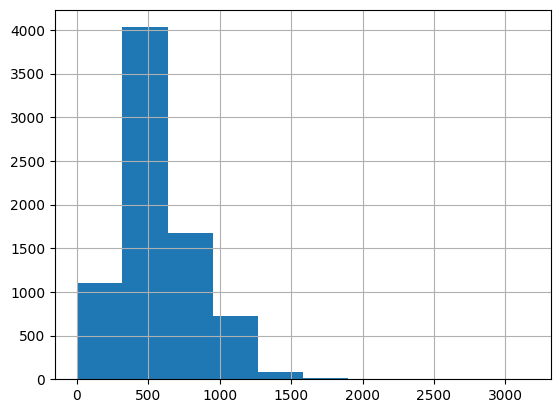

In [130]:
# Check the total characters in each lyrics.
df_lyrics['lyrics_lemmatized'].str.len().hist()

<Axes: >

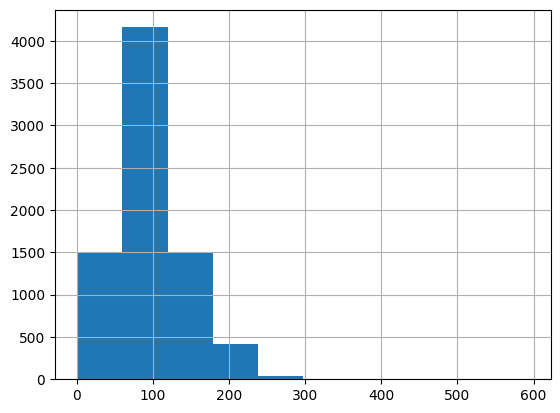

In [131]:
# Check total words in each lyrics. 
df_lyrics['lyrics_lemmatized'].str.split().map(lambda x: len(x)).hist()

Word Frequency

/usr/local/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or

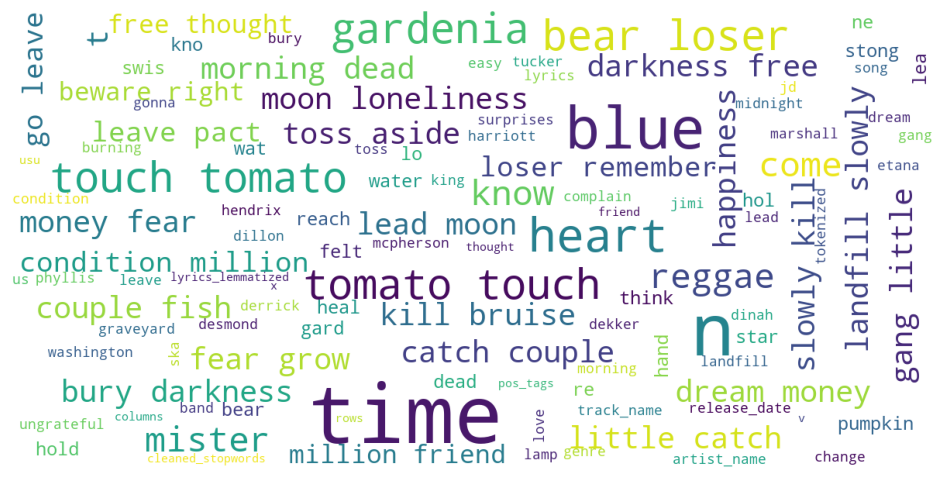

In [132]:
# Generate wordcloud.
wordcloud = WordCloud(scale=3, max_words=150, random_state=1, max_font_size=35, background_color='white')
wordcloud=wordcloud.generate(str(df_lyrics))

# Display wordcloud.
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Word Associations

In [133]:
# Check top 10 words associations. 
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(df_lyrics['lyrics_lemmatized'])
finder.nbest(bigram_measures.likelihood_ratio, 10)

[("'bout book read sing book read embarassed admit hit soft spot heart find write book read take shoulder touch arm get little cold chill feel alright book read eye mmmhmm mmmhmm oh ho oh living future feel wonderful tipping backwards ambitious look back run race book read feel finger touch arm spin around feel alright book read eye hoo ah ha oh ho na na na na na na na na nana na na na na na na na na na na nana na ha ha oh na na na na na na na na na na na na na na na na na na na nana na na na na na na na na na nana na na na na na na na na na nana na na na na naa oh ho oh oh oh oh might also like oh live future feel wonderful tipping backwards ambitious look back run race book read feel finger touch arm spin around feel alright book read eye hoo ah ha oh ho na na na na na na na na nana na na na na na na na na na nana na hey na na na na na na na na nananana na oh ho na na na na na na na na na ah na na na na ah yeah na na na na na na na na na na na ah na na na na na na na na na na na na n

Sentiments Polarity and Sentiments Analysis

<Axes: >

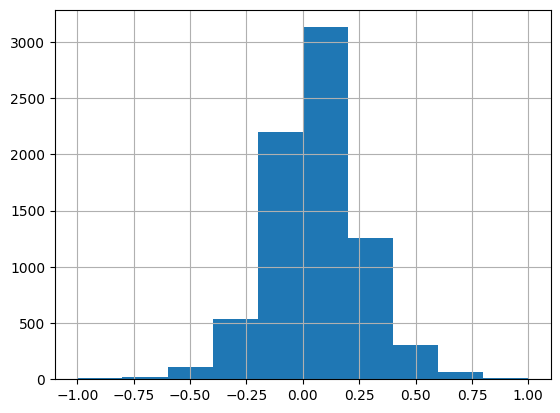

In [134]:
# Check popular sentiments of lyrics.
df_lyrics['polarity_score'] = df_lyrics['lyrics_lemmatized'].apply(lambda x : TextBlob(x).sentiment.polarity)

# Display histogram of the sentiments polarity of lyrics.
df_lyrics['polarity_score'].hist()

<Axes: ylabel='sentiments_score1'>

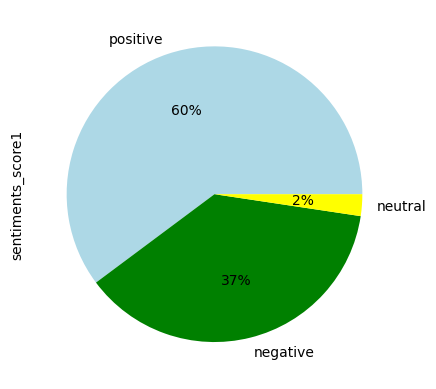

In [135]:
# Define function to classify lyrics into negative, positive, or neutral group.
def sentiment_analysis(word):
    if word<0:
        return 'negative'
    elif word==0:
        return 'neutral'
    else:
        return 'positive'

# 1.Classify the sentiment score of lyrics.
df_lyrics['sentiments_score1']= df_lyrics['polarity_score'].map(lambda word: sentiment_analysis(word))

# 2. Classify the sentiment score of lyrics.
df_lyrics['sentiments_score2']= df_lyrics['lyrics_lemmatized'].map(lambda x: TextBlob(x).sentiment.subjectivity)

# Display chart of the sentiments score of lyrics.
df_lyrics.sentiments_score1.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["lightblue", "green", "yellow"])

<Axes: ylabel='sentiments_score1'>

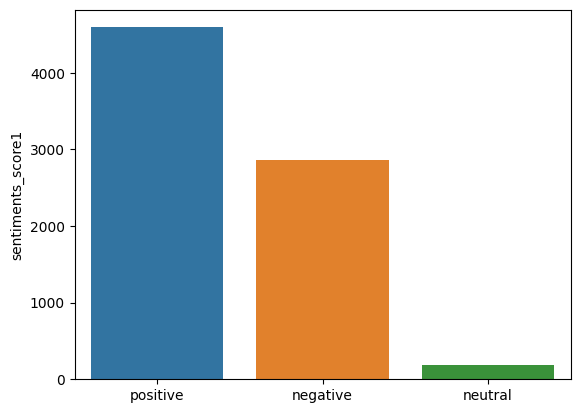

In [136]:
# Display bar graph of the sentiments score of lyrics.
sns.barplot(x=df_lyrics.sentiments_score1.value_counts().index, y=df_lyrics.sentiments_score1.value_counts() , data=df_lyrics)

In [137]:
# Check some positive lyrics. 
df_lyrics[df_lyrics['sentiments_score1']=='positive']['lyrics_lemmatized'].head()

0     heart gang little catch couple fish water swis...
1     time dream money fear grow time come think lea...
2     blue gardenia blue toss aside like gardenia ne...
8     cool water fever run high look lovelight eye c...
10    soldier peace fight look enemy door look peopl...
Name: lyrics_lemmatized, dtype: object

In [138]:
# Check some negative lyrics. 
df_lyrics[df_lyrics['sentiments_score1']=='negative']['lyrics_lemmatized'].head()

3    morning dead leave lead moon loneliness felt t...
4    bury darkness free thought happiness reach usu...
5    hear intrude dream hate appearance give right ...
6    look look look look matter want cause night fa...
7    muddy fuck water mixtape high bitch motherfuck...
Name: lyrics_lemmatized, dtype: object

In [139]:
df_lyrics.dtypes

artist_name           object
track_name            object
lyrics                object
release_date         float64
genre                 object
tokenized             object
cleaned_stopwords     object
pos_tags              object
lyrics_lemmatized     object
polarity_score       float64
sentiments_score1     object
sentiments_score2    float64
dtype: object

#### Topic  Modelling

In [140]:
# Topic modelling for lyrics. 
dictionary = gensim.corpora.Dictionary(df_lyrics['cleaned_stopwords'])
corpus = [dictionary.doc2bow(lyr_text) for lyr_text in df_lyrics['cleaned_stopwords']]
lda = gensim.models.LdaMulticore(corpus = corpus, id2word = dictionary, num_topics = 10, passes = 10, random_state=100, per_word_topics=True)
lda.show_topics()
pyLDAvis.enable_notebook()
topic_display = gensimvis.prepare(lda, corpus, dictionary)
topic_display

/usr/local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.026576  0.030689       1        1  18.290803
6      0.075068  0.005930       2        1  13.664030
3      0.021052  0.110229       3        1  10.659700
8      0.088468  0.025021       4        1  10.380959
5     -0.177550 -0.009009       5        1  10.363169
0     -0.112634 -0.010789       6        1  10.197299
9     -0.022508  0.029464       7        1   8.291390
7      0.031296  0.002368       8        1   7.668437
2      0.016691 -0.049545       9        1   5.351576
4      0.053541 -0.134358      10        1   5.132637, topic_info=      Term         Freq        Total Category  logprob  loglift
46      na  6523.000000  6523.000000  Default  30.0000  30.0000
13    good  3321.000000  3321.000000  Default  29.0000  29.0000
91      go  5547.000000  5547.000000  Default  28.0000  28.0000
16   heart  4152.000000  4152.000000  Default  27.0000  27.0000
23    long  3104.000000  3104.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
670  watch   109.010618  1191.638188  Topic10  -5.8487   0.5779
140   turn   110.891699  1826.733778  Topic10  -5.8316   0.1678
359   kill   100.149302  1117.264328  Topic10  -5.9335   0.5576
69    tell   109.565605  3477.682803  Topic10  -5.8436  -0.4880
91      go   103.545082  5547.856487  Topic10  -5.9001  -1.0116

[862 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
9553       1  0.039011  'cause
9553       2  0.018005  'cause
9553       3  0.013504  'cause
9553       4  0.001500  'cause
9553       5  0.436618  'cause
...      ...       ...     ...
775       10  0.074351   youth
25557      4  0.964896   zagga
4292       5  0.960993   zilla
26799      3  0.967680       „
17479     10  0.974519     √ßa

[3179 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 4, 9, 6, 1, 10, 8, 3, 5])

In [141]:
df_lyrics.columns

Index(['artist_name', 'track_name', 'lyrics', 'release_date', 'genre',
       'tokenized', 'cleaned_stopwords', 'pos_tags', 'lyrics_lemmatized',
       'polarity_score', 'sentiments_score1', 'sentiments_score2'],
      dtype='object')

In [142]:
df_lyrics.head(3)

,artist_name,track_name,lyrics,release_date,genre,tokenized,cleaned_stopwords,pos_tags,lyrics_lemmatized,polarity_score,sentiments_score1,sentiments_score2
0,jd mcpherson,i can't complain,heart gang little catch couple fish water swis...,2011.0,blues,"[heart, gang, little, catch, couple, fish, wat...","[heart, gang, little, catch, couple, fish, wat...","[(heart, n), (gang, n), (little, a), (catch, a...",heart gang little catch couple fish water swis...,0.197197,positive,0.556667
1,the marshall tucker band,change is gonna come,time dream money fear grow time come think lea...,1978.0,blues,"[time, dream, money, fear, grow, time, come, t...","[time, dream, money, fear, grow, time, come, t...","[(time, n), (dream, n), (money, n), (fear, n),...",time dream money fear grow time come think lea...,0.012121,positive,0.433333
2,dinah washington,blue gardenia,blue gardenia blue toss aside like gardenia ne...,1955.0,blues,"[blue, gardenia, blue, toss, aside, like, gard...","[blue, gardenia, blue, toss, aside, like, gard...","[(blue, a), (gardenia, n), (blue, n), (toss, n...",blue gardenia blue toss aside like gardenia ne...,0.053247,positive,0.257143


In [143]:
# Save the dataframe
df_lyrics.to_csv('lyrics_ready.csv')

In [145]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_lyrics['lyrics_lemmatized'], df_lyrics['genre'], test_size=0.2, random_state=42)

# Extract features from the text using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Train the model using Naive Bayes algorithm
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_features, y_train)

MultinomialNB()

In [146]:
# Make predictions on the training set
y_train_pred = nb_classifier.predict(X_train_features)

# Evaluate the performance of the model on the training set
accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8021618080576483


In [147]:
# Make predictions on the testing set
y_test_pred = nb_classifier.predict(X_test_features)

# Evaluate the performance of the model on the testing set
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6116568434839554
